Enter your first name: carl

Hi! Carl, welcome to SGV Value at Risk Calculator!
Enter Stock Symbol: aapl
Input Start Date (20XX-01-31): 2012-12-1
Input End Date (20XX-12-31): 2012-12-30


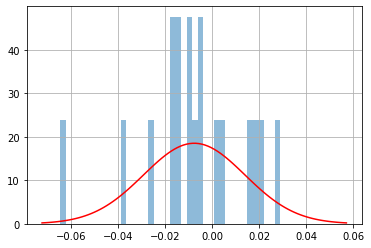

None
---  ----------
90%  -0.0351332
95%  -0.0429631
99%  -0.0576505
---  ----------


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 20 13:45:30 2019

@author: VZ589XA
"""


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab

from scipy.stats import norm

import quandl

from tabulate import tabulate

user_name = input("Enter your first name: ")
print(f'\nHi! {user_name.title()}, welcome to SGV Value at Risk Calculator!') 

company_name = input("Enter Stock Symbol: ")
company_name = (company_name.upper())
beg = input("Input Start Date (20XX-01-31): ")
end = input("Input End Date (20XX-12-31): ")
ticker = "WIKI/"+ company_name

df = quandl.get(ticker, start_date = beg, end_date = end)
df = df[['Close']]
df['returns'] = df.Close.pct_change()

mean = np.mean(df['returns'])
std_dev = np.std(df['returns'])

df['returns'].hist(bins=40, normed= True, histtype = 'stepfilled', alpha=0.5)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x, norm.pdf(x,mean,std_dev),"r")
print(plt.show())

VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95,mean,std_dev)
VaR_99 = norm.ppf(1-0.99,mean,std_dev)

print(tabulate([['90%', VaR_90],['95%', VaR_95],['99%', VaR_99]]))